# Priority Queue

## Agenda

1. "Priority Queue"
2. Naive implementation
3. Heap
    - Mechanics
    - Implementation
    - Run-time Analysis
4. Heap Construction
5. Heapsort

## 1. Priority Queue

The priority queue ADT is similar to a queue, in that values are conceptually added to one end and taken out another. Values are not dequeued from a priority queue in FIFO order, however. Instead, each value in a priority queue has an implicit "priority", and the *value with maximum priority is always dequeued first*, regardless of when it was enqueued. 

## 2. Naive implementation

In [5]:
class PriorityQueue:
    def __init__(self):
        self.data = []
        
    def add(self, x): # O(N)
        # insert x in right spot
        for i in range(len(self.data)):
            if self.data[i] > x:
                self.data.insert(i, x)
                break
        else:
            self.data.append(x)
    
    def max(self): # O(1)
        assert len(self) > 0
        return self.data[-1]
        
    def pop_max(self): # O(1)
        assert len(self) > 0
        return self.data.pop(-1)
    
    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [6]:
import random

pq = PriorityQueue()

for _ in range(10):
    pq.add(random.randrange(1000))

In [7]:
pq

[21, 396, 475, 525, 539, 566, 598, 735, 775, 850]

In [8]:
pq.max()

850

In [9]:
while pq:
    print(pq.pop_max())

850
775
735
598
566
539
525
475
396
21


In [10]:
pq = PriorityQueue()

for _ in range(10):
    pq.add(random.randrange(1000))

for _ in range(10):
    pq.add(random.randrange(1000))
    print(pq)
    print(pq.pop_max())

[34, 137, 223, 288, 352, 425, 445, 456, 556, 782, 926]
926
[34, 137, 223, 288, 326, 352, 425, 445, 456, 556, 782]
782
[34, 137, 223, 288, 326, 352, 425, 445, 456, 556, 994]
994
[34, 137, 161, 223, 288, 326, 352, 425, 445, 456, 556]
556
[34, 137, 161, 223, 288, 306, 326, 352, 425, 445, 456]
456
[34, 137, 161, 223, 288, 306, 326, 352, 425, 445, 688]
688
[34, 137, 161, 223, 288, 306, 326, 352, 425, 445, 760]
760
[34, 137, 161, 223, 288, 291, 306, 326, 352, 425, 445]
445
[34, 137, 161, 223, 288, 291, 306, 326, 352, 425, 762]
762
[34, 137, 161, 223, 288, 291, 306, 326, 352, 425, 929]
929


The thing with using an array as a priority queue is that we either commit fully in `add` performance or `max` and `pop_max` performance sacrificing the rest. Ordering here is convenient but superfluous. Is there any other data structure we can use?

## 3.-1 Binary tree primer

A binary tree is a data structure that is either empty, or consists of a node with a value and references left and right subtrees that are also binary trees.

Always add nodes as leaves, but then we can juggle that values along the tree.

Metrics:
- Depth of node: number of nodes from this node to root
- Height of node: number of nodes on longest part downwards to some leaf
- Height of tree: height of its root

Classes of binary trees:
- Perfect: all internal nodes have 2 children, all leaves same depth
- Full: all nodes have 0 or 2 children
- Complete: all levels are completely filled (except maybe the bottom), nodes in the bottom level are packed towards one side

## 3. Heap

A heap is an implementation of a priority queue that imposes a *partial ordering* on its contents. A heap takes the form of a *complete binary tree* where every node adheres to the *heap property*, i.e., that the value in a given node is the maximum value in the subtree of which it is the root. It can be called max-heap or min-heap.

### Mechanics

The heap property is maintained across insertions and removals by way of the "bubble up" and "trickle down" algorithms.

![](../images/12-heap-mechanics.jpg)

Note that the "trickle down" algorithm can also be thought of as a way of "re-heapifying" a tree where all nodes but the root obey the heap property.

### Implementation

We represent the heap in an array, where the node at index $i$ has children at indices $2i + 1$ and $2i + 2$. Conversely, the parent of index $i$ is at index $\lfloor \frac{i-1}{2} \rfloor$.

In [44]:
class Heap:
    def __init__(self):
        self.data = []

    @staticmethod
    def _parent(idx):
        return (idx - 1) // 2
    
    @staticmethod
    def _left(idx):
        return 2*idx + 1
    
    @staticmethod
    def _right(idx):
        return 2*idx + 2

    def add(self, x): # O(N)
        # add new node at rightmost bottom level of tree
        # that is, last slot in backing array
        # then, carry out bubble-up
        self.data.append(x)
        idx = len(self.data) - 1
        while idx > 0:
            pidx = Heap._parent(idx)
            if self.data[pidx] < self.data[idx]: 
                # heap property violated, swap
                self.data[pidx], self.data[idx] = self.data[idx], self.data[pidx]
                idx = pidx
            else:
                break

                
    def max(self): # O(1)
        assert len(self) > 0
        return self.data[0]
    
    def _heapify(self, idx): # O(1)
        # implements trickle-down algorithm
        while idx < len(self.data):
            maxidx = idx
            # Need to check indices for validity
            lidx = Heap._left(idx)
            ridx = Heap._right(idx)
            if lidx < len(self.data) and self.data[idx] < self.data[lidx]:
                maxidx = lidx
            if ridx < len(self.data) and self.data[maxidx] < self.data[ridx]:
                maxidx = ridx
            if maxidx != idx:
                # if max is not the parent
                self.data[idx], self.data[maxidx] = self.data[maxidx], self.data[idx]
                idx = maxidx
            else:
                break

    def pop_max(self):
        assert len(self) > 0
        # replace root with node at rightmost bottom level
        # delete element at at rightmost bottom level
        # then, carry out "trickle-down" (heapify)
        ret = self.data[0]
        self.data[0] = self.data[-1]
        del self.data[-1]

        self._heapify(0)
        
        return ret

    def __bool__(self):
        return len(self.data) > 0

    def __len__(self):
        return len(self.data)

    def __repr__(self):
        return repr(self.data)

In [6]:
import random

h = Heap()

vals = random.sample(range(100), 10) # ensure unique values
for x in vals:
    h.add(x)

In [7]:
h

[81, 60, 65, 41, 44, 51, 15, 16, 27, 11]

In [8]:
h.max()

81

In [9]:
print(h)
while h:
    print(h.pop_max())
    print(h)

[81, 60, 65, 41, 44, 51, 15, 16, 27, 11]
81
[65, 60, 51, 41, 44, 11, 15, 16, 27]
65
[60, 44, 51, 41, 27, 11, 15, 16]
60
[51, 44, 16, 41, 27, 11, 15]
51
[44, 41, 16, 15, 27, 11]
44
[41, 27, 16, 15, 11]
41
[27, 15, 16, 11]
27
[16, 15, 11]
16
[15, 11]
15
[11]
11
[]


### Run-time Analysis

![](../images/12-heap-runtime.jpg)

I.e., when adding or removing elements from a heap, we need to carry out at most $O(h)$ operations, where $h$ is the number of levels in the heap, to ensure the heap property is established throughout. Since the heap takes the form of a complete binary tree, and the height $h$ of the tree is $O(\log N)$, where $N$ is the number of elements in the tree, we conclude that **the add and remove heap operations are both $O(\log N)$**.

## 4. Heap Construction

If we construct a heap of $N$ elements by simply calling `add` $N$ times, it is easy to see that this approach has $O(N \log N)$ runtime complexity.

Can we do better?

Yes! If we are given a list of $N$ values from which to construct a heap, we start by observing that we can interpret the list as the representation of a complete binary tree. In this tree, the only values that may violate the heap property are those found in *internal nodes* (i.e., nodes with at least 1 child).

Recall that if we are given a complete tree where only the root node violates the heap property, we can re-heapify it by applying the trickle-down algorithm starting at the root.

Therefore, to build a heap out of a list, we need only apply the trickle-down algorithm to each node starting at the deepest, right-most internal node, all the way up until we hit the root.

Requirement for heapification: for each node, its two subtrees must be max-heaps.

![](../images/12-heap-building.jpg)

In a tree with $N$ total nodes, there are only $\lfloor \frac{N-1}{2} \rfloor$ internal nodes, which means that we only need to apply the trickle-down algorithm to roughly *half* of the nodes in the tree. Note, also, that the runtime complexity of trickle-down depends on the height of the node, which only matches the height of the tree at the root. We will not prove this, but building a heap using this approach yields an algorithm with a runtime complexity of $O(N)$.

In [57]:
class Heap(Heap):
    def __init__(self, iterable=None):
        if not iterable:
            self.data = []
        else:
            self.data = list(iterable)
            # perform heap construction trick above
            # first, find rightmost internal node
            idx = Heap._parent(len(self.data) - 1)
            for i in range(idx, -1, -1): # O(N)
                self._heapify(i)

In [52]:
import random

h = Heap()

vals = random.sample(range(100), 10)
for x in vals:
    h.add(x)

In [53]:
h

[90, 64, 62, 50, 59, 37, 6, 10, 30, 17]

In [54]:
while h:
    print(h.pop_max())

90
64
62
59
50
37
30
17
10
6


In [58]:
h = Heap(random.sample(range(100), 10)) # use the new heap initializer
print(h)

while h:
    print(h.pop_max())

[94, 84, 89, 63, 66, 79, 76, 62, 26, 13]
94
89
84
79
76
66
63
62
26
13


## 5. Heapsort

We can use a heap to implement an efficient sorting algorithm: heapsort!

In [59]:
def heapsort(iterable):
    h = Heap(iterable) # O(N)
    sorted_iter = []
    while h: # O(N log N)
        sorted_iter.append(h.pop_max()) # O(log N)
    sorted_iter.reverse()
    return sorted_iter

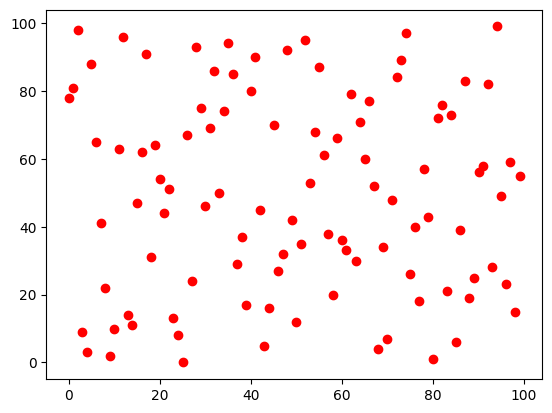

In [61]:
import matplotlib.pyplot as plt
import numpy as np

lst = list(range(100))
random.shuffle(lst)
plt.plot(lst, 'ro');

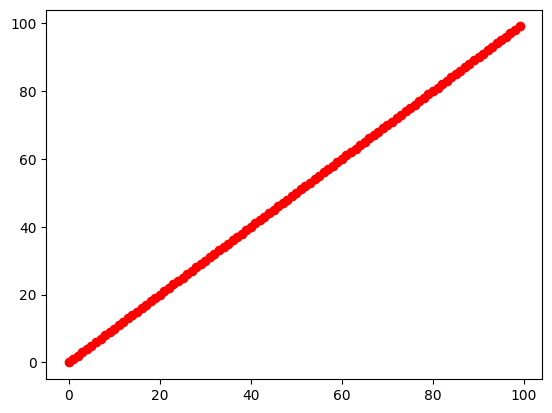

In [62]:
plt.plot(heapsort(lst), 'ro');

In [63]:
def insertion_sort(lst):
    for i in range(1, len(lst)):
        for j in range(i, 0, -1):
            if lst[j-1] > lst[j]:
                lst[j-1], lst[j] = lst[j], lst[j-1] # swap
            else:
                break

In [64]:
import timeit

def time_insertionsort(n):
    return timeit.timeit('insertion_sort(lst)',
                         f'lst = random.sample(range(1_000_000), {n})',
                         globals=globals(),
                         number=1)

def time_heapsort(n):
    return timeit.timeit('heapsort(lst)',
                         f'lst = random.sample(range(1_000_000), {n})',
                         globals=globals(),
                         number=1)

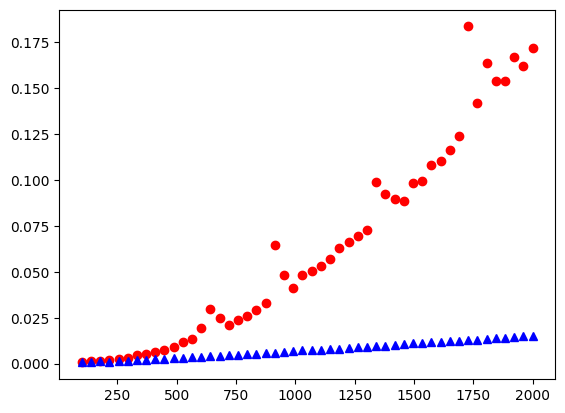

In [65]:
ns = np.linspace(100, 2000, 50, dtype=np.int_)
plt.plot(ns, [time_insertionsort(n) for n in ns], 'ro')
plt.plot(ns, [time_heapsort(n) for n in ns], 'b^');

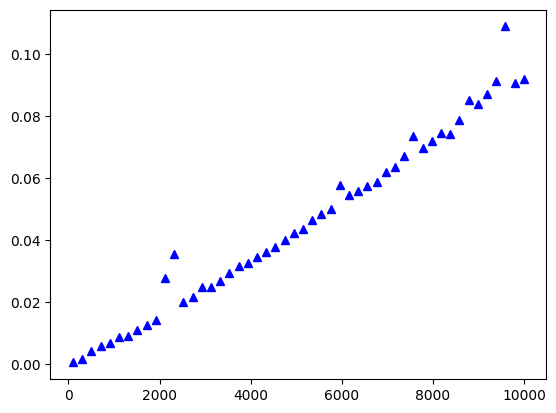

In [66]:
ns = np.linspace(100, 10000, 50, dtype=np.int_)
plt.plot(ns, [time_heapsort(n) for n in ns], 'b^');

Heapsort is the first sorting algorithm we've encountered with $O(N \log N)$.